# __Unit 1 Final Project__
## __Group 13:__ _<small>Coral Marina Jackson, DavidIsaac Marple, Anna Kalea Mills, Sumirpriya Nemani, Arya Tara Oak, Charlie Walker, Erin Yoon</small>_

___
<h1 style="color: #265678; font-weight: bold;">  
1. Python Code and Resulting Visualization of IF Neuron, LIF Neuron, and Feed Forward Models
</h1>

<div style="background-color: #b6c6db; padding: 10px; margin-bottom: 10px;">
    
#### __IF Neuron Code and Visualization__

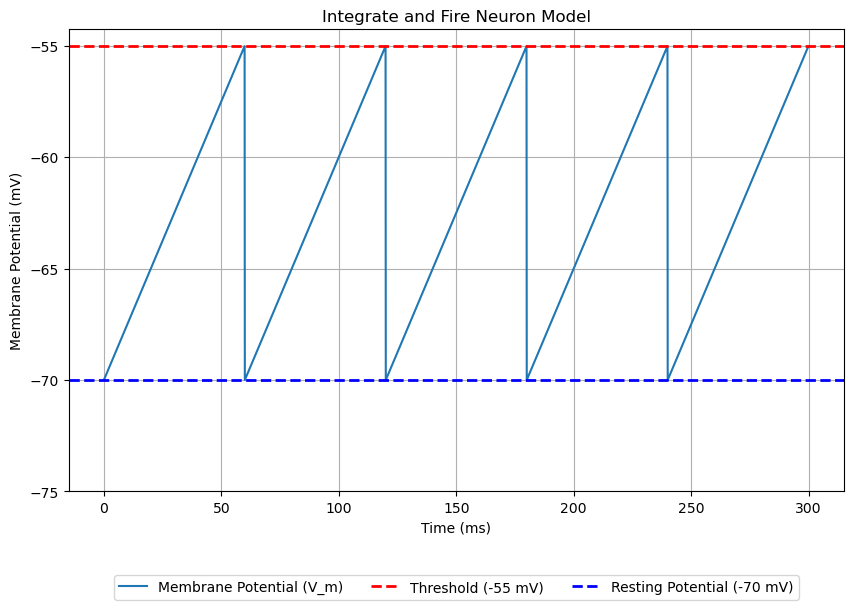

In [389]:
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 300   # total simulation time (ms) to allow for more cycles
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # resting potential (mV)
V_thresh = -55  # threshold potential (mV)
V_reset = V_rest  # Reset to resting potential instead of below it

# Input current
I_ext = 0.25  # Adjusted for approximately 6 cycles

# Initialize membrane potential
V_m = np.full_like(time, V_rest)

# Simulate the model
for t in range(1, len(time)):
    V_m[t] = V_m[t-1] + (I_ext * dt)  # Linear increase

    # Check for spike
    if V_m[t] >= V_thresh:
        V_m[t] = V_reset  # Reset to resting potential after spike

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, V_m, label="Membrane Potential (V_m)")
plt.axhline(V_thresh, color='r', linestyle='--', label="Threshold (-55 mV)", linewidth=2)
plt.axhline(V_rest, color='b', linestyle='--', label="Resting Potential (-70 mV)", linewidth=2)

# Axis labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate and Fire Neuron Model")

# Adjust y-axis ticks to include -55 mV
y_ticks = np.arange(min(V_m) - 5, max(V_m) + 5, 5)  # Generate tick marks every 5 mV
if V_thresh not in y_ticks:
    y_ticks = np.append(y_ticks, V_thresh)  # Ensure -55 mV is included
plt.yticks(y_ticks)

# Adjust legend position further below to avoid overlapping with x-axis label
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid()
plt.show()


<div style="background-color: #b6c6db; padding: 10px; margin-bottom: 10px;">

#### __LIF Model Code and Visualization__

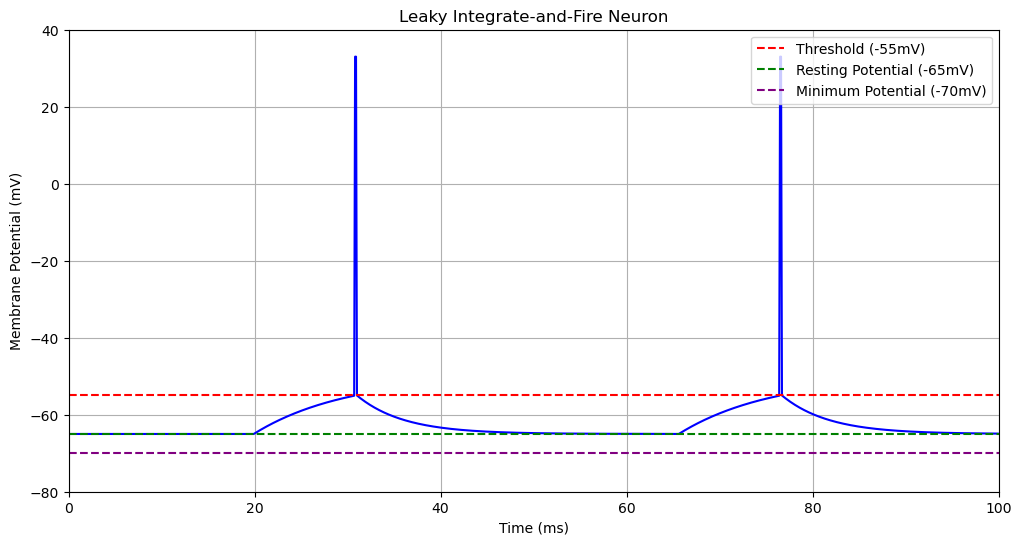

In [391]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
V_rest = -65e-3  # Resting potential (-65 mV)
V_th = -55e-3    # Threshold potential (-55 mV)
V_reset = -70e-3 # Minimum potential (-70 mV)
tau = 10e-3      # Membrane time constant (10 ms)
tau_decay = 5e-3 # Decay time constant (5 ms)
R = 10e6         # Membrane resistance (10 MΩ)
I = 1.5e-9       # Input current (1.5 nA)

# Simulation parameters
dt = 0.1e-3      # Time step (0.1 ms)
t_max = 100e-3   # Total simulation time (100 ms)
t = np.arange(0, t_max, dt)  # Time array

# Initialize membrane potential
V = np.zeros_like(t)
V[0] = V_rest

# State tracking
spike_phase = 0  # 0=normal, 1=spiking, 2=decaying
decay_start_time = 0

# Input current parameters
stim_start = 20e-3  # Stimulation start (20 ms)
stim_end = 80e-3    # Stimulation end (80 ms)

# Simulation loop
for i in range(1, len(t)):
    if spike_phase == 1:
        # Complete the spike by returning to threshold
        V[i] = V_th
        spike_phase = 2
        decay_start_time = t[i]
    elif spike_phase == 2:
        # Exponential decay from threshold to resting potential
        time_since_decay = t[i] - decay_start_time
        V[i] = V_rest + (V_th - V_rest) * np.exp(-time_since_decay/tau_decay)
        
        # Check if decay is complete
        if V[i] <= V_rest + 1e-5:  # Threshold for completion
            V[i] = V_rest
            spike_phase = 0
    else:
        # Normal operation
        # Check stimulation current
        if stim_start <= t[i] < stim_end:
            I_current = I
        else:
            I_current = 0
        
        # Update membrane potential
        dV = ((V_rest - V[i-1]) + I_current * R) / tau * dt
        V[i] = V[i-1] + dV
        
        # Check for spike threshold
        if V[i] >= V_th:
            # Create vertical spike (current and previous points to 33mV)
            V[i-1] = 33e-3
            V[i] = 33e-3
            spike_phase = 1
    
    # Enforce minimum potential
    if V[i] < V_reset:
        V[i] = V_reset

# Convert units for plotting
t_plot = t * 1e3  # Convert to milliseconds
V_plot = V * 1e3  # Convert to millivolts

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t_plot, V_plot, color='blue')
plt.axhline(y=V_th*1e3, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=V_rest*1e3, color='green', linestyle='--', label='Resting Potential (-65mV)')
plt.axhline(y=V_reset*1e3, color='purple', linestyle='--', label='Minimum Potential (-70mV)')
plt.title('Leaky Integrate-and-Fire Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim(-80, 40)
plt.xlim(0, t_max*1e3)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<div style="background-color: #b6c6db; padding: 10px; margin-bottom: 10px;">
    
#### __Feed Forward Model Code and Visualization__

##### __Theoretical Visualization Code__

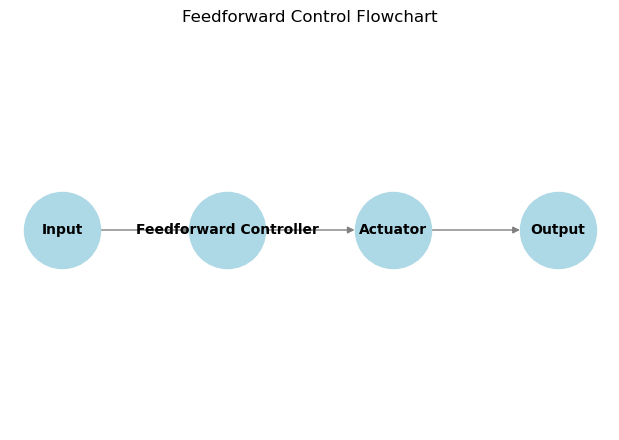

In [394]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define the nodes
nodes = ["Input", "Feedforward Controller", "Actuator", "Output"]
G.add_nodes_from(nodes)

# Define the edges (connections between nodes)
edges = [("Input", "Feedforward Controller"), ("Feedforward Controller", "Actuator"), ("Actuator", "Output")]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(6, 4))
pos = {"Input": (0, 1), "Feedforward Controller": (1, 1), "Actuator": (2, 1), "Output": (3, 1)}
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Feedforward Control Flowchart")
plt.show()


#### __Code with Biological Inputs__

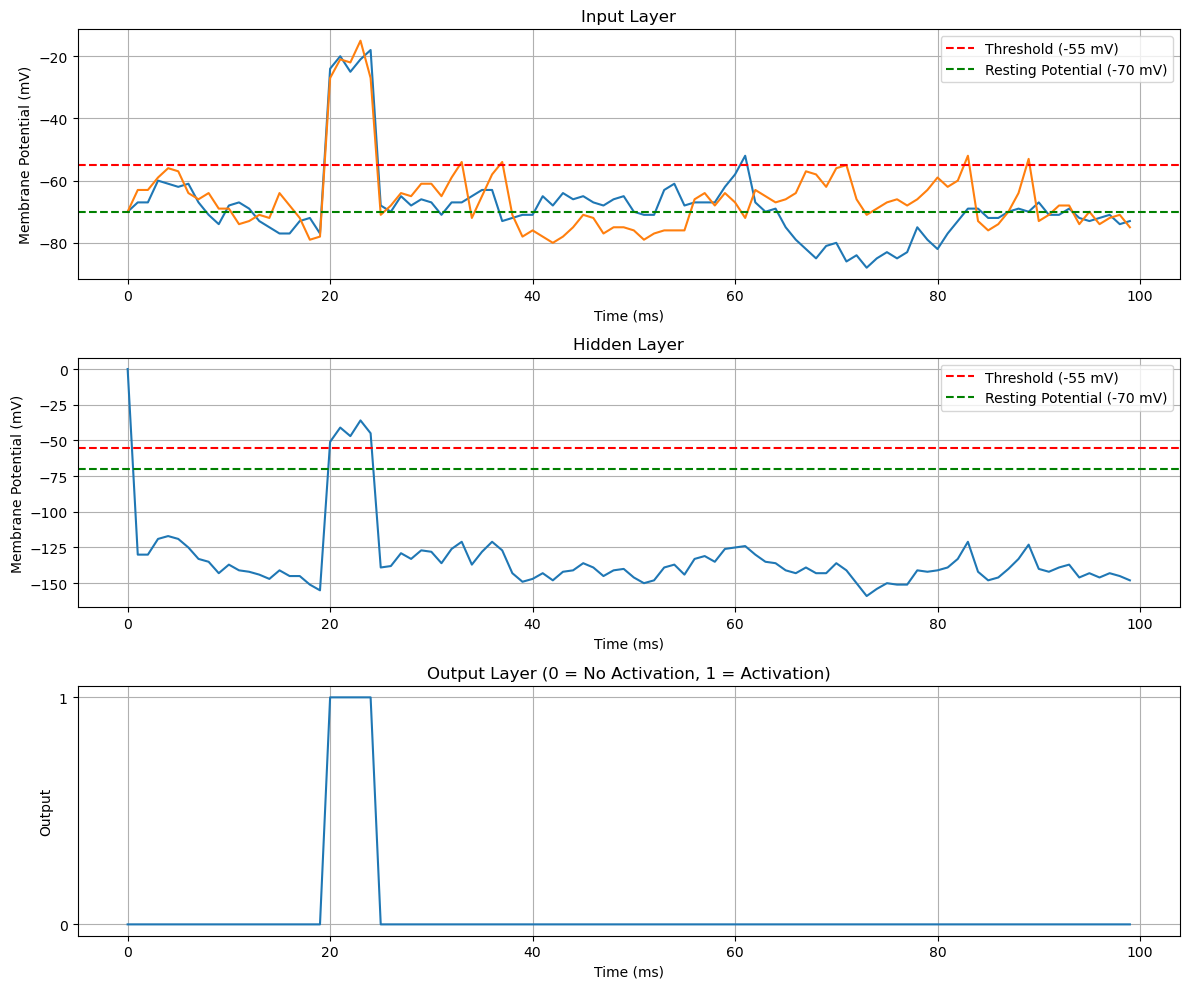

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
threshold = -55  # Threshold potential in mV
resting_potential = -70  # Resting potential in mV
input_size = 2  # Reduced number of input neurons
hidden_size = 2  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
time_steps = 100  # Time steps to simulate

# Simulate inputs over time
np.random.seed(42)
inputs = np.random.randn(time_steps, input_size) * 4  # Adjusted input strength

# Boost specific time steps to ensure threshold crossing
inputs[20:25] += 50  # Strong input burst to cross the threshold

# Initialize weights for hidden layer
weights_input_hidden = np.random.uniform(0.5, 1.5, input_size)  # Adjusted weights for balanced activation

# Initialize membrane potentials
membrane_potential_input = np.full((time_steps, input_size), resting_potential)
membrane_potential_hidden = np.zeros(time_steps)  # Initialize with zeros
membrane_potential_output = np.zeros(time_steps)  # Output will be binary (0 or 1)

# Store membrane potentials before reset for visualization
membrane_potential_input_before_reset = np.copy(membrane_potential_input)

# Activation function (simple threshold model)
def activate(potential):
    return np.where(potential >= threshold, 1, 0)

# Simulation loop
for t in range(1, time_steps):
    # Input Layer (integration of inputs)
    membrane_potential_input[t] = membrane_potential_input[t-1] + inputs[t]

    # Store potentials before reset
    membrane_potential_input_before_reset[t] = membrane_potential_input[t]

    # Apply threshold activation for input neurons
    activation_input = activate(membrane_potential_input[t])

    # Hidden Layer (Sum of the inputs across time)
    membrane_potential_hidden[t] = np.sum(membrane_potential_input[t])

    # Output Layer (0 for not crossing threshold, 1 for crossing threshold)
    membrane_potential_output[t] = activate(membrane_potential_hidden[t])

    # Reset neurons after firing
    membrane_potential_input[t][activation_input == 1] = resting_potential

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Input Layer Visualization
axs[0].plot(membrane_potential_input_before_reset)
axs[0].axhline(threshold, color='red', linestyle='--', label='Threshold (-55 mV)')
axs[0].axhline(resting_potential, color='green', linestyle='--', label='Resting Potential (-70 mV)')
axs[0].set_title('Input Layer')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Membrane Potential (mV)')
axs[0].legend()
axs[0].grid()

# Hidden Layer Visualization (Sum of Inputs)
axs[1].plot(membrane_potential_hidden)
axs[1].axhline(threshold, color='red', linestyle='--', label='Threshold (-55 mV)')
axs[1].axhline(resting_potential, color='green', linestyle='--', label='Resting Potential (-70 mV)')
axs[1].set_title('Hidden Layer')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Membrane Potential (mV)')
axs[1].legend()
axs[1].grid()

# Output Layer Visualization (Binary Output)
axs[2].plot(membrane_potential_output)
axs[2].set_title('Output Layer (0 = No Activation, 1 = Activation)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Output')
axs[2].set_yticks([0, 1])  # Set y-axis ticks to 0 and 1
axs[2].grid()

plt.tight_layout()
plt.show()

___
<h1 style="color: #265678; font-weight: bold;">  
2. Discussion/Evaluation/Analysis of Models
</h1>

<div style="background-color: #d5e4f0; padding: 10px; margin-bottom: 10px;">
    
### __Description of Each Model__
#### __Integrate and Fire Model:__ 
An integrate-and-fire (IF) model is a simplistic model of neuronal spiking where the input is current, which is integrated until threshold is reached, upon which it fires and is reset. Like in a biological neuron, the IF model can generate spike trains, which can provide insight into the firing frequencies and summation behaviors of neurons. The IF model mimics the all-or-nothing response of a biological neuron once threshold is reached, and it integrates and sums inputs like a biological neuron to determine if threshold has been reached and if an action potential should fire. However, the IF model does differ from biological neurons in multiple key ways, which limit its effectiveness as a model. Upon reaching threshold and firing an action potential, the voltage of biological neurons gradually returns to their resting potential; as seen in the visualization of the IF model, the return to threshold in this model is immediate and decidedly not gradual. The IF model also depicts a linear integration of current, which does not occur in biological neurons. The linearity in membrane potential increase and immediate resetting once membrane potential is reached as seen in the IF model does not account for the actual intricacies and complexities of membrane potential changes when firing an action potential. It does not show hyperpolarization which occurs in biological neurons. In a biological neuron, there is decay in current as it passes through the neuron and this model does not have differential decay based on location of the synapse and input current. The IF model does not account for either the leaky ion channels present in biological neurons or for the voltage-gated ion channels which are responsible for spike generation in biological neurons. The IF model contains no explanation of where input current comes from. Overall, the IF model is useful to depict a simple picture of the neuron’s all-or-nothing firing of action potentials in response to current summation, but it lacks the complexity of a biological neuron and does not accurately depict the intricacies of the current integration process.
#### __Leaky Integrate and Fire Model:__ 
As suggested by its name, the leaky integrate and fire model includes the neuronal membrane potential’s natural decay to the resting potential via leaky ion channels (particularly potassium movement). External input current is integrated, increasing the membrane potential and eventually making the model “fire” an action potential once it reaches threshold. Benefits of using this model include that it is more realistic than the integrate and fire model due to its depiction of decay. However, the LIF model is limited in that it ignores detailed ion channel mechanisms, such as the opening and closing of voltage gated channels that precedes action potentials. Like the Integrate and Fire model, it also does not account for input current, the fact that all ion channels do not behave identically, or that different parts of the neuron have different properties. 
#### __Feedforward Neural Network:__
The feedforward neural network is a simple artificial neural network where information moves unidirectionally from the input layer, though hidden layers, and to the output layer. The input layer receives data, the hidden layer performs computations, and the output layer presents the products of said computations. Each neuron involved has a specific weight it gives to the input– this ability to adjust the contribution that inputs make to the final output is a clear advantage of feedforward neural networks. In this model, the input comes in and is processed by the controller which receives the inputs and decides what should happen, providing the instructions on how to operate based on the input received. These instructions are sent to the actuator, which actually does the operation, and then we see the resulting output. For example: presynaptic inputs are passed through the controller algorithm (where the inputs are summed and weighted). If the integrated inputs cross the threshold, we get an output of an action potential in the model. However, feedforward neural networks are limited in that they lack memory– there is no built-in mechanism for assessing the timing of data inputs and outputs because they are purely feed-forward, not recurrent. This model also does not allow for prediction or error correction, which is important in biological neurons.  


<div style="background-color: #c7dbed; padding: 10px; margin-bottom: 10px;">

### __Comparison and Evaluation of the Models__
* The 3 models we used in this project are the Integrate and Fire model (IF), the Leaky Integrate and Fire model (LIF), and the Feed Forward model (FF). The IF and LIF models are very similar in the aspects of a biological neuron that they can accurately depict, as they both are good for visualising basic properties, like neuronal spiking. However, the IF model assumes a perfect system with no leakage of current, and thus has a linear increase in membrane potential with no decay and harsh resetting. The LIF model accounts for some of the leakage of current with the addition of leaky ion channels, which allows for a more natural decay of membrane potential. They both do not have mechanisms for the production of action potentials and require a spike generator. 
* The FF model is different from both the IF and LIF model in what it depicts. The FF neural model is useful for visualizing the flow of information rapidly: from incoming inputs, instructions for operation based on the inputs, and the resulting output from the operation. It works well to show neuronal response to inputs, given that the instructions it operates based on are accurate. It differs from the IF and LIF model as it is more abstract, and does not explicitly focus on biological properties like leaky ion channels. 
* All the models have some method of input integration and dynamics.

<div style="background-color: #c7d4ed; padding: 10px; margin-bottom: 10px;">

### __Comparison of the Models based on Information Theory__
Information Theory: Disregarding the meaning of signals, how can we quantify the storage and transmission of information?

#### __Integrate and Fire:__
The most concise– it only takes into account inputs and outputs, with spikes as a carrier of binary information: the input is either sufficient to confer a spike, or insufficient and no spike. Due to this simplicity, it is also the model with the least number of bits.

#### __Leaky Integrate and Fire:__
Similar to the integrate and fire model, the LIF model uses spikes as carriers of binary information. Either input reaches the threshold and an action potential is fired, or information is insufficient and no action potential occurs, which is a single bit of information. However, the LIF model contains more information about neural activity and behavior because it accounts for leaky ion channels and depicts a gradual return to resting potential. A gradual return to resting potential contains more information than an immediate reset to resting potential. The LIF model stores information about how a neuron behaves after an action potential over time, which requires more bits of information than the IF’s immediate reset to rest.

#### __Feedforward Neural Network:__
Feedforward neural networks require the most bits– each neuron must track input, output, and weights. For similar reasons, they are also the most complex. Rather than undertaking a simple “does the input reach the threshold? If yes, fire an action potential/if no, don’t fire” process like the integrate-and-fire and leaky integrate-and-fire models, the feedforward neural network allows for the output to be more or less influenced by input stimuli based on weights assigned to individual neurons.


___
<h1 style="color: #265678; font-weight: bold;">  
3. Visualization of the LIF model when Inputs Differ
</h1>

Below we have our code for the LIF model with not enough inputs to reach threshold

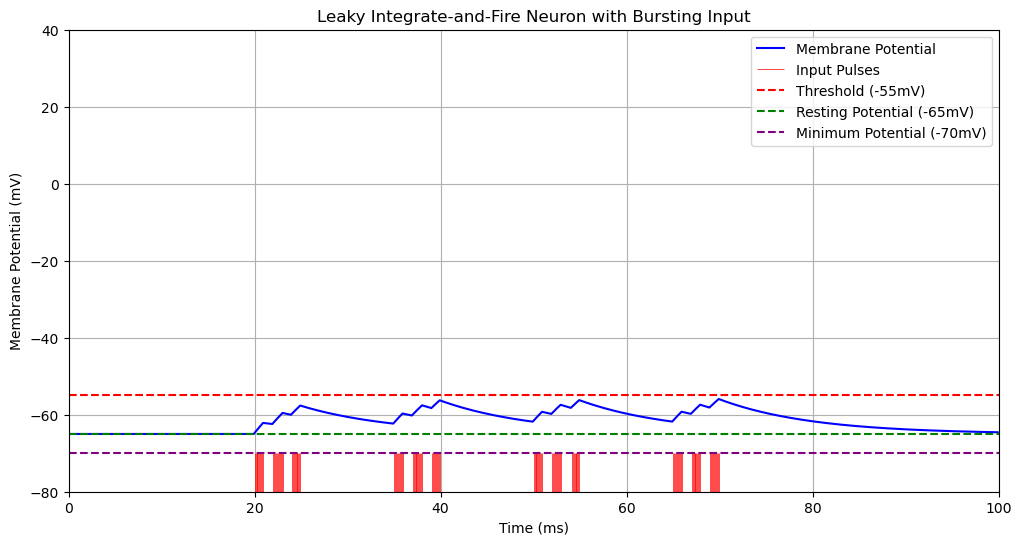

In [402]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
V_rest = -65e-3  # Resting potential (-65 mV)
V_th = -55e-3    # Threshold potential (-55 mV)
V_reset = -70e-3 # Minimum potential (-70 mV)
tau = 10e-3      # Membrane time constant (10 ms)
tau_decay = 5e-3 # Decay time constant (5 ms)
R = 10e6         # Membrane resistance (10 MΩ)
I = 3e-9         # Increased input current for bursting (3 nA)

# Simulation parameters
dt = 0.1e-3      # Time step (0.1 ms)
t_max = 100e-3   # Total simulation time (100 ms)
t = np.arange(0, t_max, dt)  # Time array

# Bursting input parameters
burst_start = 20e-3  # First burst start time (20 ms)
burst_end = 80e-3    # Last burst end time (80 ms)
burst_interval = 15e-3  # Time between burst starts (15 ms)
burst_duration = 5e-3  # Duration of each burst (5 ms)
pulse_duration = 1e-3  # Duration of each pulse in burst (1 ms)
pulse_interval = 1e-3  # Interval between pulses in burst (1 ms)

# Initialize membrane potential
V = np.zeros_like(t)
V[0] = V_rest

# State tracking
spike_phase = 0  # 0=normal, 1=spiking, 2=decaying
decay_start_time = 0

# Generate burst times
burst_times = []
current_burst = burst_start
while current_burst + burst_duration <= burst_end:
    burst_times.append((current_burst, current_burst + burst_duration))
    current_burst += burst_interval

# Simulation loop
for i in range(1, len(t)):
    # Check for bursting input
    I_current = 0
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            # Calculate time since burst started
            t_since_burst = t[i] - burst_start
            # Check if in active pulse period
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                I_current = I
    
    if spike_phase == 1:
        # Complete the spike by returning to threshold
        V[i] = V_th
        spike_phase = 2
        decay_start_time = t[i]
    elif spike_phase == 2:
        # Exponential decay from threshold to resting potential
        time_since_decay = t[i] - decay_start_time
        V[i] = V_rest + (V_th - V_rest) * np.exp(-time_since_decay/tau_decay)
        
        # Check if decay is complete
        if V[i] <= V_rest + 1e-5:  # Threshold for completion
            V[i] = V_rest
            spike_phase = 0
    else:
        # Update membrane potential
        dV = ((V_rest - V[i-1]) + I_current * R) / tau * dt
        V[i] = V[i-1] + dV
        
        # Check for spike threshold
        if V[i] >= V_th:
            # Create vertical spike (current and previous points to 33mV)
            V[i-1] = 33e-3
            V[i] = 33e-3
            spike_phase = 1
    
    # Enforce minimum potential
    if V[i] < V_reset:
        V[i] = V_reset

# Convert units for plotting
t_plot = t * 1e3  # Convert to milliseconds
V_plot = V * 1e3  # Convert to millivolts

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t_plot, V_plot, color='blue', label='Membrane Potential')
plt.title('Leaky Integrate-and-Fire Neuron with Bursting Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')

# Add input current visualization
input_signal = np.zeros_like(t)
for i in range(len(t)):
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            t_since_burst = t[i] - burst_start
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                input_signal[i] = 1

plt.eventplot([t_plot[input_signal == 1]], colors=['red'], lineoffsets=-75, 
              linelengths=10, linewidths=0.5, label='Input Pulses')

plt.axhline(y=V_th*1e3, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=V_rest*1e3, color='green', linestyle='--', label='Resting Potential (-65mV)')
plt.axhline(y=V_reset*1e3, color='purple', linestyle='--', label='Minimum Potential (-70mV)')
plt.ylim(-80, 40)
plt.xlim(0, t_max*1e3)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<div style="background-color: #d5e4f0; padding: 10px; margin-bottom: 10px;">

### __Comparing the Models/Changes Made to the Code:__
The image below shows the two models. On the left we have the original and on the right we have the modified input visualization where the inputs are not enough to reach threshold. We made the following changes to our original code: 
#### Input current visualization in the new code: 
“input_signal = np.zeros_like(t)
for i in range(len(t)):
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            t_since_burst = t[i] - burst_start
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                input_signal[i] = 1
plt.eventplot([t_plot[input_signal == 1]], colors=['red'], lineoffsets=-75, 
              linelengths=10, linewidths=0.5, label='Input Pulses')”
#### Burst times generation:
“burst_times = []
current_burst = burst_start
while current_burst + burst_duration <= burst_end:
    			burst_times.append((current_burst, current_burst + burst_duration))
   			 current_burst += burst_interval”
#### Input current application
Before: 
"if stim_start <= t[i] < stim_end:
   		 I_current = I
else:
   		 I_current = 0"

After: 
"I_current = 0
for burst_start, burst_end in burst_times:
    if burst_start <= t[i] < burst_end:
        t_since_burst = t[i] - burst_start
        pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
        if pulse_phase < pulse_duration:
            I_current = I"
#### Input current parameters:
Before: 
"I = 1.5e-9       # Input current (1.5 nA)
stim_start = 20e-3  # Stimulation start (20 ms)
stim_end = 80e-3    # Stimulation end (80 ms)"

After:
"I = 3e-9         # Increased input current for bursting (3 nA)
burst_start = 20e-3  # First burst start time (20 ms)
burst_end = 80e-3    # Last burst end time (80 ms)
burst_interval = 15e-3  # Time between burst starts (15 ms)
burst_duration = 5e-3  # Duration of each burst (5 ms)
pulse_duration = 1e-3  # Duration of each pulse in burst (1 ms)
pulse_interval = 1e-3  # Interval between pulses in burst (1 ms)"

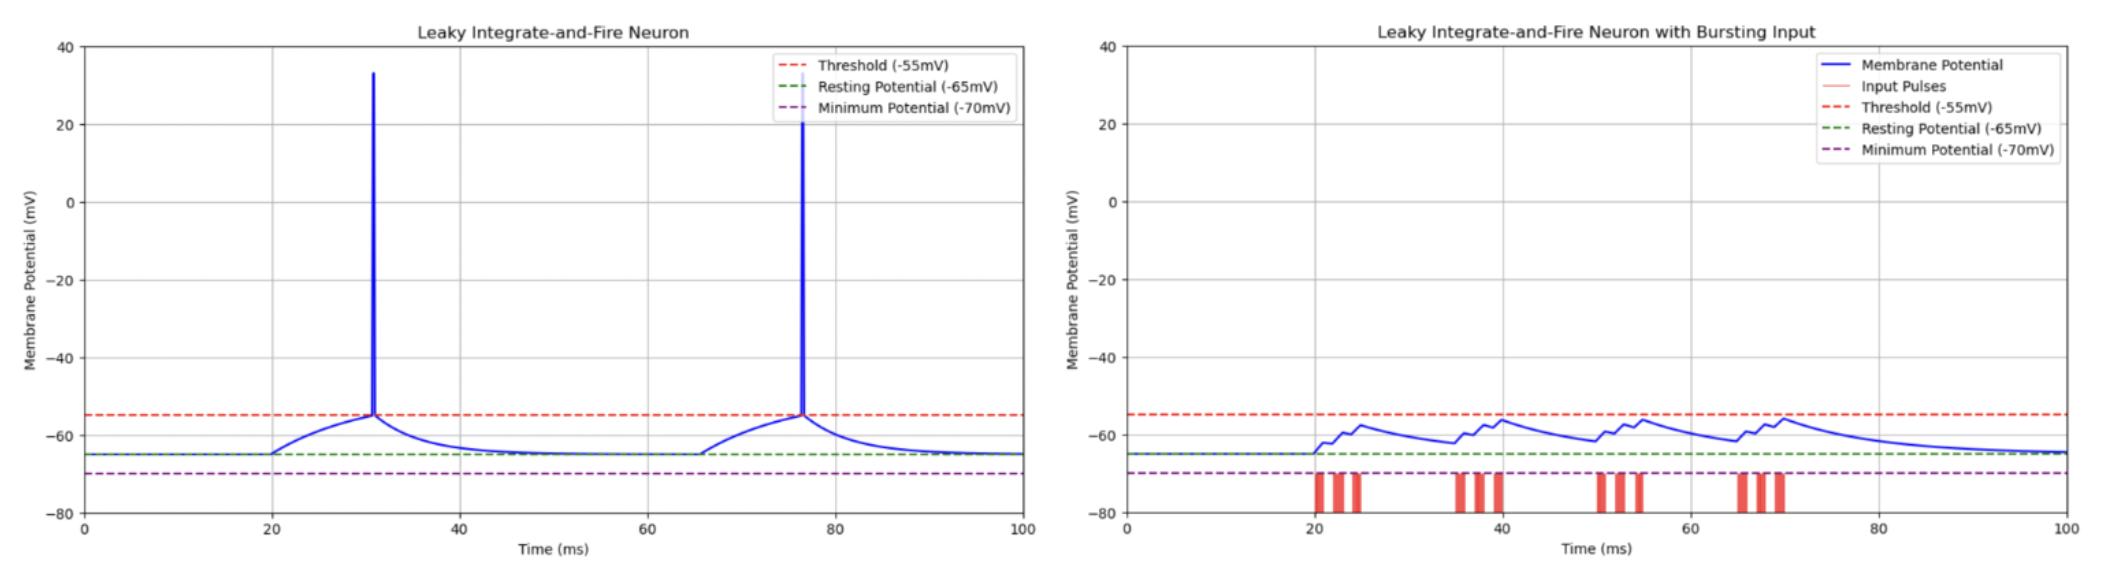

___
<h1 style="color: #265678; font-weight: bold;">  
4. Visualization of the IF model with Inhibitory Inputs
</h1>

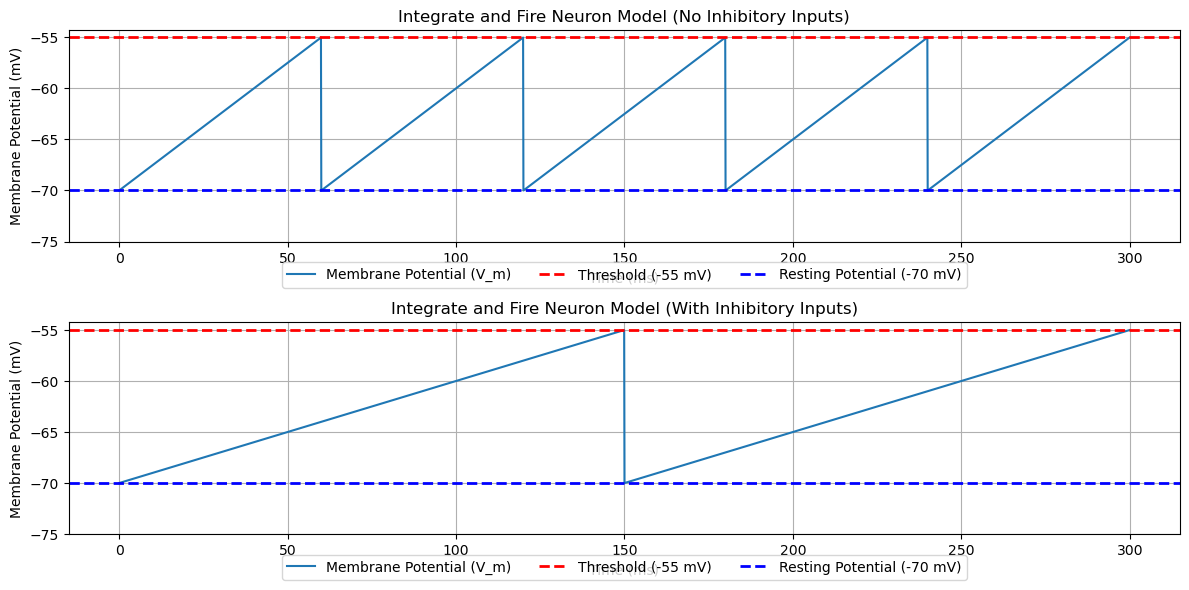

In [406]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 300   # total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # resting potential (mV)
V_thresh = -55  # threshold potential (mV)
V_reset = V_rest  # Reset to resting potential

# Input currents
I_ext = 0.25  # Excitatory current
I_inh = -0.15  # Inhibitory current (negative to simulate inhibition)

# Initialize membrane potential for both cases
V_m_no_inhibition = np.full_like(time, V_rest)  # No inhibitory inputs
V_m_with_inhibition = np.full_like(time, V_rest)  # With inhibitory inputs

# Simulate the model without inhibitory inputs
for t in range(1, len(time)):
    V_m_no_inhibition[t] = V_m_no_inhibition[t-1] + (I_ext * dt)  # Linear increase

    # Check for spike
    if V_m_no_inhibition[t] >= V_thresh:
        V_m_no_inhibition[t] = V_reset  # Reset to resting potential after spike

# Simulate the model with inhibitory inputs
for t in range(1, len(time)):
    # Add both excitatory and inhibitory inputs
    V_m_with_inhibition[t] = V_m_with_inhibition[t-1] + (I_ext + I_inh) * dt

    # Check for spike
    if V_m_with_inhibition[t] >= V_thresh:
        V_m_with_inhibition[t] = V_reset  # Reset to resting potential after spike

# Plot the results without inhibitory inputs
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_m_no_inhibition, label="Membrane Potential (V_m)")
plt.axhline(V_thresh, color='r', linestyle='--', label="Threshold (-55 mV)", linewidth=2)
plt.axhline(V_rest, color='b', linestyle='--', label="Resting Potential (-70 mV)", linewidth=2)

# Axis labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate and Fire Neuron Model (No Inhibitory Inputs)")

# Adjust y-axis ticks
y_ticks = np.arange(min(V_m_no_inhibition) - 5, max(V_m_no_inhibition) + 5, 5)
if V_thresh not in y_ticks:
    y_ticks = np.append(y_ticks, V_thresh)
plt.yticks(y_ticks)

# Legend and grid
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid()

# Plot the results with inhibitory inputs
plt.subplot(2, 1, 2)
plt.plot(time, V_m_with_inhibition, label="Membrane Potential (V_m)")
plt.axhline(V_thresh, color='r', linestyle='--', label="Threshold (-55 mV)", linewidth=2)
plt.axhline(V_rest, color='b', linestyle='--', label="Resting Potential (-70 mV)", linewidth=2)

# Axis labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate and Fire Neuron Model (With Inhibitory Inputs)")

# Adjust y-axis ticks
y_ticks = np.arange(min(V_m_with_inhibition) - 5, max(V_m_with_inhibition) + 5, 5)
if V_thresh not in y_ticks:
    y_ticks = np.append(y_ticks, V_thresh)
plt.yticks(y_ticks)

# Legend and grid
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<div style="background-color: #d5e4f0; padding: 10px; margin-bottom: 10px;">

### __Changes Made to the Original IF Code to Produce the Model__
The main change that was made to the code was that the input current was changed to be a negative value to represent the inhibitory input. This then resulted in a modified simulation loop that was able to add the inhibitory inputs with the excitatory inputs. Beyond this, there was new code made in order to create the second plot that shows the I&F model with the inhibitory inputs. The resulting model was similar to the model with just excitatory inputs except it took longer for the inputs to sum and reach threshold. 

___

<h1 style="color: #265678; font-weight: bold;">  
5. Coincidence Detection for Sound
</h1>

<div style="background-color: #d5e2ed; padding: 10px; margin-bottom: 10px;">

## <u>__What is it?__<u>
#### In order to determine where a sound is coming from, coincidence detection is utilized by the auditory system. Coincidence detection refers to a process where certain neurons will only fire if they receive multiple inputs from different sources close enough in time to sum. In the auditory system, tiny differences in when a sound reaches each ear (also known as interaural time differences) are used to determine the sound’s origin. Each ear contains a set of neural pathways called delay lines which have the same axonal conduction velocities along the path and allow for the neuron to be tuned to specific interaural time differences. In the body, one of the most prominent coincidence detectors is the [NMDA receptor](https://pmc.ncbi.nlm.nih.gov/articles/PMC8307462/), which utilizes magnesium to help regulate activation of different pathways based on coincidence.
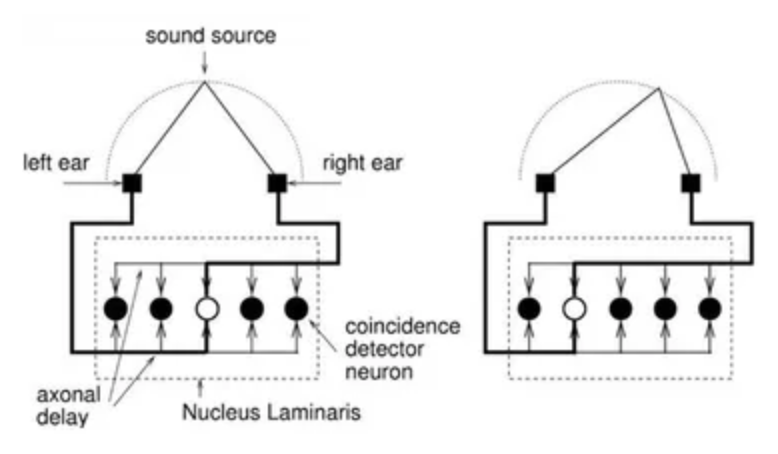
#### This [figure](https://www.frontiersin.org/journals/computational-neuroscience/articles/10.3389/fncom.2012.00006/full) illustrates how coincidence detection occurs in the auditory system. In the diagram on the left, the sound source is located at a midpoint between each ear, and the signal from each ear reaches the central coincidence detection neuron at the same time, so that is the neuron that will fire. In the diagram on the right, the sound source is located closer to the right ear than the left ear, and the coincidence detector neuron that fires is one that is on the left side. This is because the signal will travel further from the right ear than the left ear because the right ear received the signal first. By the time the signal from the right ear has reached the neuron that is left of the center neuron (meaning this signal from the right ear has traveled all the way past the center neuron), the signal from the left ear will have only begun to travel along the delay pathway, so it will reach the left of center neuron at the same time as the right-ear signal.

<div style="background-color: #c7dbed; padding: 10px; margin-bottom: 10px;">

## <u>__Neural Mechanisms/Structures involved include:__<u>
### __1) Binaural Processing:__ 
#### Coincidence detection occurs in neurons that receive input from both ears, allowing them to compare the interaural time differences and interaural level differences when sound reaches each ear at slightly different times or intensities as a result of the Doppler effect. 
* #### __Interaural time difference:__
    * #### the difference in the arrival time of the sound at each ear. If a sound is coming from a midpoint between each ear, then the interaural time difference will be zero.
* #### __[Interaural level difference:](https://isle.hanover.edu/Ch11AudBrainLoc/Ch11InterLoud.html)__ 
    * #### the difference in the intensity of the sound when it reaches each ear. Sound waves weaken as they travel, so a sound that originates on the right will be more intense when it reaches the right ear then it will be when it reaches the left ear. Interaural level differences are useful cues for high-frequency sounds because of the acoustic shadow cast by the head. For high-frequency sounds, the head blocks a significant amount of sound waves as the sound moves through the head from one side to another, intensifying the interaural level differences. For low-frequency sounds, their interaural level difference is insignificant because the head is small relative to the wavelength of these sounds, so the soundwave is able to travel through the head without being significantly dampened.

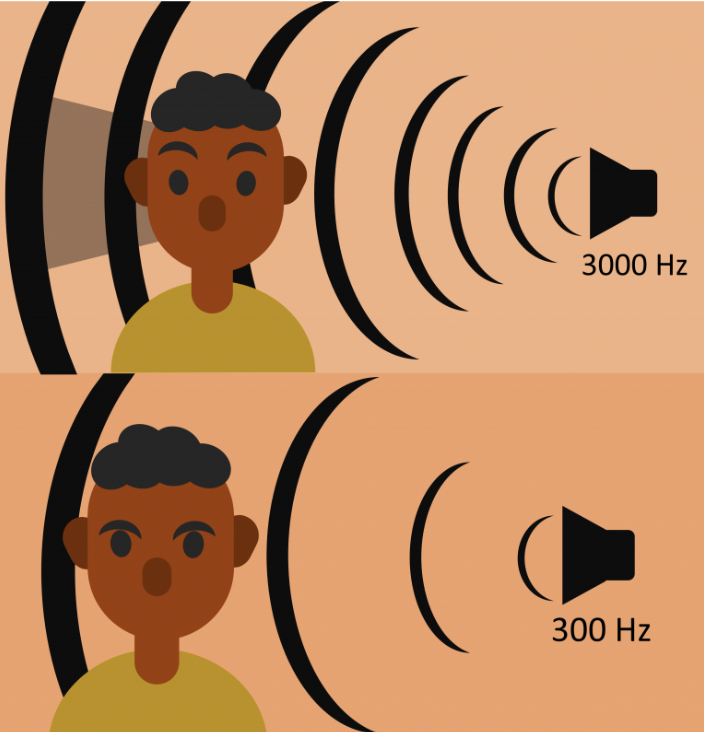
#### This [figure](https://pressbooks.umn.edu/sensationandperception/chapter/interaural-level-difference-draft/#:~:text=Interaural%20level%20difference%20refers%20to,it%20passes%20through%20your%20head.) illustrates why an acoustic shadow only occurs in high-frequency sounds and not in low-frequency sounds. The wavelengths for the low frequency sound are large enough that they can pass from one side of the head to the other without being disturbed or dampened, but in high-frequency sounds, the wavelengths are small enough that the head is and does impact them as the sound travels through the head from one ear to the other.
### __2) [Phase-Locking:](https://www.jneurosci.org/content/39/21/4077)__
* #### Auditory nerve fibers encode sound waves by firing actual potentials that are phase-locked to the waveform, providing precise temporal cues for coincidence detection. Phase-locking is utilized in coincidence detection in sound because it helps locate low-frequency sounds, as well as help with the interpretation of pitch and speech. In the cochlea, we can see that phase-locking in bushy cells is more precise in picking up lower frequencies in comparison to phase-locking in the auditory nerve. In addition, a higher rate of phase locking reduces the temporal period in which coincidences can occur.
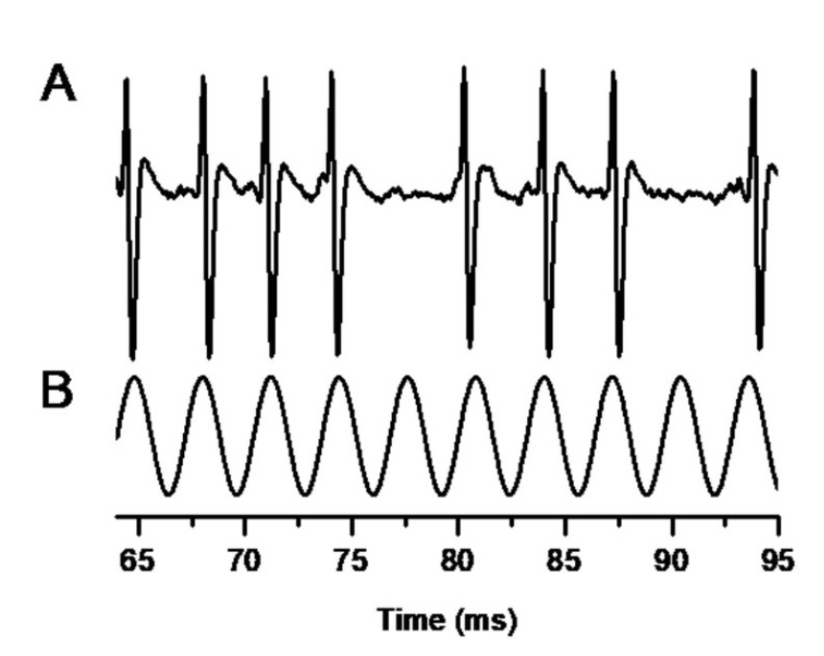
### __3) [Octopus cells:](https://journals.physiology.org/doi/full/10.1152/jn.1997.78.2.872)__ 
* #### Neurons that are most commonly found in the mammalian cochlear nucleus. They are called octopus cells due to their numerous branching dendrites that transmit information at high speeds.
### __4) Bushy cells:__ 
* #### There are two types, spherical and globular. Globular bushy cells take in inputs from up to 40 different nerve fibers; on the other hand, spherical bushy cells take in inputs from 4 main nerve fibers. 
### __5) Medial Superior Olive:__ 
* #### Localizes low-frequency sounds by processing interaural time differences
### __6) Lateral Superior Olive:__ 
* #### Localizes high-frequency sounds by processing interaural level differences
### __7) Inferior Colliculus:__ 
* #### Integrates binaural cues to determine spatial hearing
### __8) Bipolar Dendrites:__ 
* #### Inputs from the ear are separated; ipsilateral ear’s inputs terminate on the dorsal dendrite, and contralateral ear’s inputs terminate on the ventral dendrite


<div style="background-color: #c7d4ed; padding: 10px; margin-bottom: 10px;">

## <u>__Real World Application__<u>
#### IMAX theaters are known for supporting immersive movie-viewing experiences. This is in part due to their application of surround sound, which involves having multiple speakers around the theater playing different audio tracks. Coincidence detection is what allows viewers to feel as if they are in the middle of the movie, with different sound bytes coming from different areas around them. For a more comprehensive overview, check out ["The Art of Imax Sound by Cinetext"(4:15)!](https://www.youtube.com/watch?v=ZWo3bwD6ONg&t=255s)
